<a href="https://colab.research.google.com/github/Pratyushk2003/predis-prject/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd

json_file_path1 = '/content/inputs.json'
json_file_path2 = '/content/outputs.json'

with open(json_file_path1, 'r') as f1, open(json_file_path2, 'r') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

merged_df = pd.merge(df1, df2, on='config_id')

merged_df['output_texts'] = merged_df['output_texts'].apply(lambda x: ' '.join(str(x).split()))
merged_df['output_texts'] = merged_df['output_texts'].str.lower()

csv_file_path = '/content/merged_file.csv'
merged_df.to_csv(csv_file_path, index=False)
print(merged_df)

                                              post_idea  \
0     Trevor from GTA V explaining the First Heist t...   
1     Trevor from GTA V explaining the First Heist t...   
2     Trevor from GTA V explaining the First Heist t...   
3     ingredients of anti pollution skincare product...   
4                   Must visit 5 temples of  tamil nadu   
...                                                 ...   
1909                            tasmia homemade kitchen   
1910  mockup de curso de paseo de perros, con fotos ...   
1911  mockup de curso de paseo de perros, con fotos ...   
1912  mockup de curso de paseo de perros, con fotos ...   
1913  Infográfico mostrando alimentos que promovem a...   

                     config_id input_language output_language  \
0     65800e11721e674e1099ab8c        english         english   
1     65800e11721e674e1099ab8c        english         english   
2     65800e11721e674e1099ab8c        english         english   
3     65800d44721e674e1099ab5a 

In [2]:
import pandas as pd

csv_file_path = '/content/merged_file.csv'
merged_df = pd.read_csv(csv_file_path)

output_texts_column = merged_df['output_texts']
data = [eval(entry) for entry in output_texts_column]

new_df = pd.DataFrame()
new_df['output_texts'] = [
    f"{entry['h1']}. {entry['h2']}" if 'h1' in entry else f"{entry['title']}. {entry['subtitle']}"
    for entry in data
]

merged_df['output_texts'] = new_df['output_texts']

merged_df.to_csv(csv_file_path, index=False)

print(merged_df)

                                              post_idea  \
0     Trevor from GTA V explaining the First Heist t...   
1     Trevor from GTA V explaining the First Heist t...   
2     Trevor from GTA V explaining the First Heist t...   
3     ingredients of anti pollution skincare product...   
4                   Must visit 5 temples of  tamil nadu   
...                                                 ...   
1909                            tasmia homemade kitchen   
1910  mockup de curso de paseo de perros, con fotos ...   
1911  mockup de curso de paseo de perros, con fotos ...   
1912  mockup de curso de paseo de perros, con fotos ...   
1913  Infográfico mostrando alimentos que promovem a...   

                     config_id input_language output_language  \
0     65800e11721e674e1099ab8c        english         english   
1     65800e11721e674e1099ab8c        english         english   
2     65800e11721e674e1099ab8c        english         english   
3     65800d44721e674e1099ab5a 

In [3]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 938.6 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=95027c45009333b357f8c39ac211cac6d5b5ea43e1dd6eecf1d27db68c0590f5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [4]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

csv_file_path = '/content/merged_file.csv'
merged_df = pd.read_csv(csv_file_path)

post_idea_column = merged_df['post_idea']
output_texts_column = merged_df['output_texts']

model = SentenceTransformer('all-MiniLM-L6-v2')

post_idea_embeddings = model.encode(post_idea_column.tolist(), convert_to_tensor=True)
output_texts_embeddings = model.encode(output_texts_column.tolist(), convert_to_tensor=True)

cosine_scores = util.cos_sim(post_idea_embeddings, output_texts_embeddings)

merged_df['relevance_scores'] = cosine_scores.diagonal()

merged_df.to_csv('/content/merged_file_with_relevance_scores.csv', index=False)

print(merged_df)

                                              post_idea  \
0     Trevor from GTA V explaining the First Heist t...   
1     Trevor from GTA V explaining the First Heist t...   
2     Trevor from GTA V explaining the First Heist t...   
3     ingredients of anti pollution skincare product...   
4                   Must visit 5 temples of  tamil nadu   
...                                                 ...   
1909                            tasmia homemade kitchen   
1910  mockup de curso de paseo de perros, con fotos ...   
1911  mockup de curso de paseo de perros, con fotos ...   
1912  mockup de curso de paseo de perros, con fotos ...   
1913  Infográfico mostrando alimentos que promovem a...   

                     config_id input_language output_language  \
0     65800e11721e674e1099ab8c        english         english   
1     65800e11721e674e1099ab8c        english         english   
2     65800e11721e674e1099ab8c        english         english   
3     65800d44721e674e1099ab5a 

In [6]:
import pandas as pd

# Load the CSV file
csv_file_path = '/content/merged_file_with_relevance_scores.csv'  # Replace with the actual path to your CSV file
merged_df = pd.read_csv(csv_file_path)

# Calculate average relevance score for each unique input_language
average_scores = merged_df.groupby('input_language')['relevance_scores'].mean()

# Display the average scores
print("Average Relevance Scores by Input Language:")
print(average_scores)


Average Relevance Scores by Input Language:
input_language
chinese (traditional)    0.340701
english                  0.580006
french                   0.483560
german                   0.511798
indonesian               0.529386
italian                  0.498451
portuguese_br            0.569558
spanish                  0.587225
turkish                  0.593189
vietnamese               0.537290
Name: relevance_scores, dtype: float64


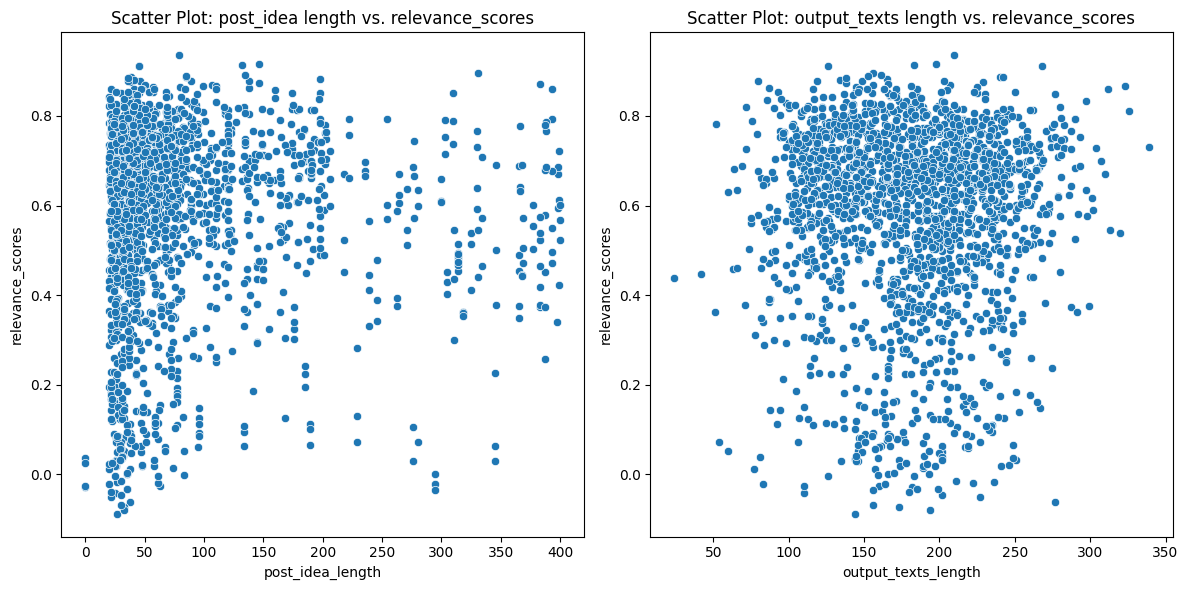

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with relevance scores
csv_file_path = '/content/merged_file_with_relevance_scores.csv'
merged_df = pd.read_csv(csv_file_path)

# Check and handle NaN values in 'post_idea' and 'output_texts'
merged_df['post_idea_length'] = merged_df['post_idea'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)
merged_df['output_texts_length'] = merged_df['output_texts'].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

# Scatter plot for 'post_idea' length vs. relevance_scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='post_idea_length', y='relevance_scores', data=merged_df)
plt.title('Scatter Plot: post_idea length vs. relevance_scores')

# Scatter plot for 'output_texts' length vs. relevance_scores
plt.subplot(1, 2, 2)
sns.scatterplot(x='output_texts_length', y='relevance_scores', data=merged_df)
plt.title('Scatter Plot: output_texts length vs. relevance_scores')

plt.tight_layout()
plt.show()


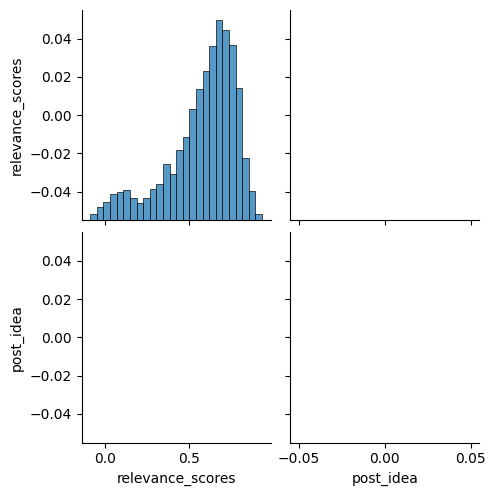

<ipython-input-10-1145f91cd764>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df[['post_idea', 'output_texts', 'relevance_scores']].corr()


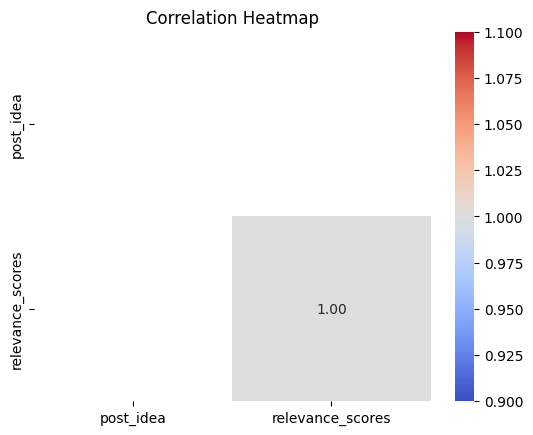

<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 37323 (\N{CJK UNIFIED IDEOGRAPH-91CB}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.tight_layout()
<ipython-input-10-1145f91cd764>:35: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
<ipython-input-10

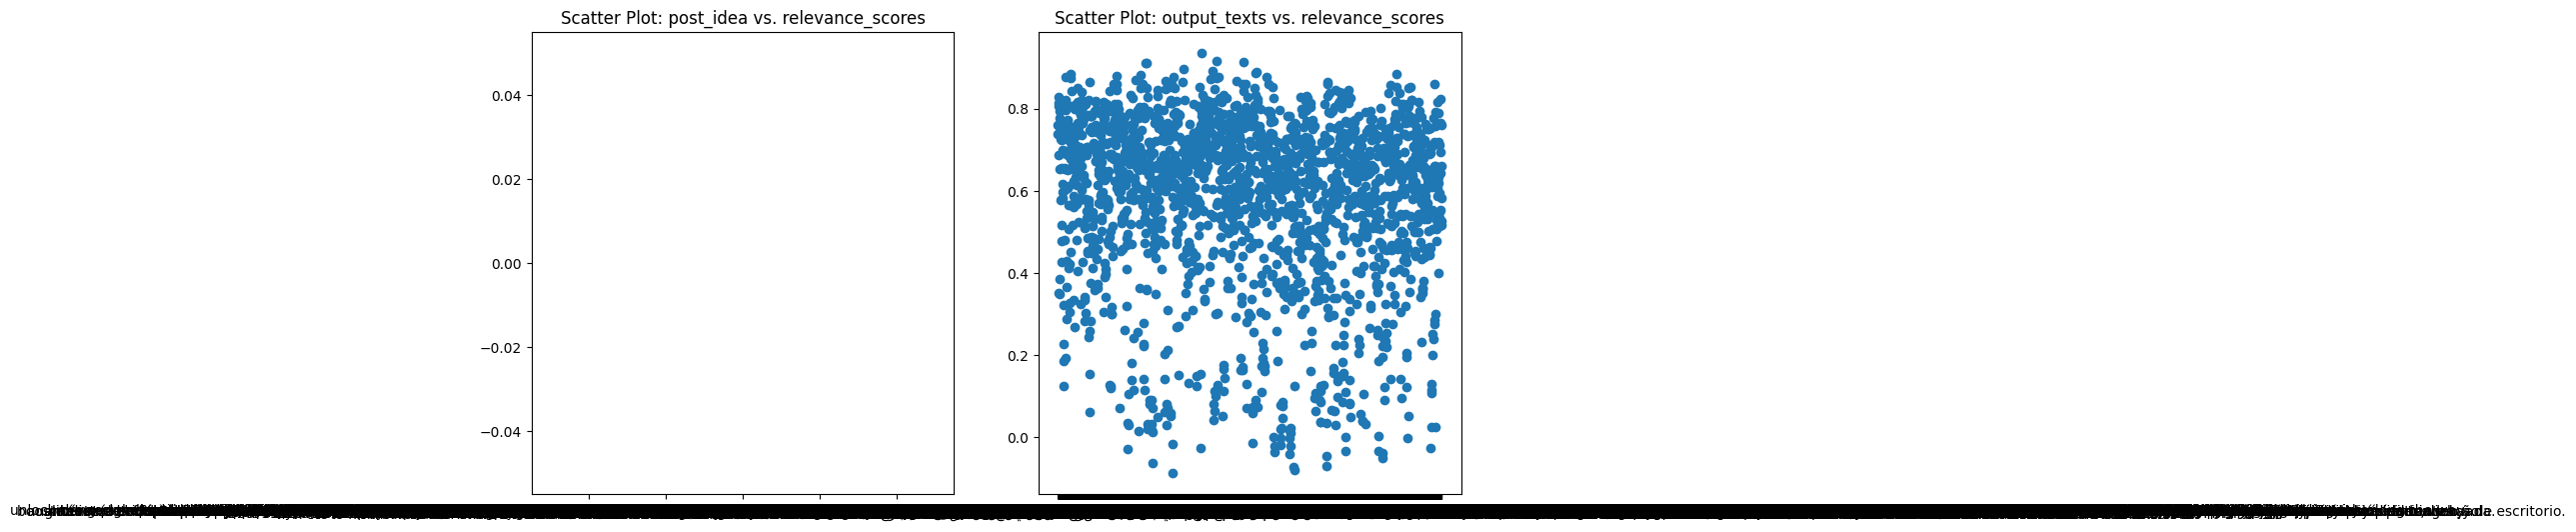

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with relevance scores
csv_file_path = '/content/merged_file_with_relevance_scores.csv'
merged_df = pd.read_csv(csv_file_path)

# Convert 'post_idea' to numeric (assuming it contains numeric values)
merged_df['post_idea'] = pd.to_numeric(merged_df['post_idea'], errors='coerce')

# Explore patterns with pairplots and correlation heatmap
pairplot_columns = ['relevance_scores']
pairplot_columns.extend(['post_idea', 'output_texts'])
sns.pairplot(merged_df[pairplot_columns])
plt.show()

# Correlation heatmap
correlation_matrix = merged_df[['post_idea', 'output_texts', 'relevance_scores']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Explore patterns with scatter plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(merged_df['post_idea'], merged_df['relevance_scores'])
plt.title('Scatter Plot: post_idea vs. relevance_scores')

plt.subplot(1, 2, 2)
plt.scatter(merged_df['output_texts'], merged_df['relevance_scores'])
plt.title('Scatter Plot: output_texts vs. relevance_scores')

plt.tight_layout()
plt.show()
